In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

* Customer ID >> not needed
* And so Gender and Age are
* Cluster is based on spending and annual income


In [8]:
X = data.iloc[:,[3,4]].values  
print(X[0:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


###  Data visualization

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

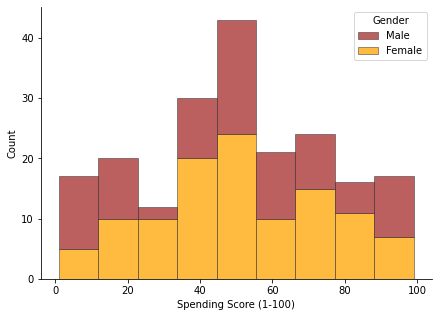

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(data,x="Spending Score (1-100)", hue="Gender",multiple="stack",
   color="b", edgecolor=".2",linewidth=.5,palette=['brown','orange'],
)

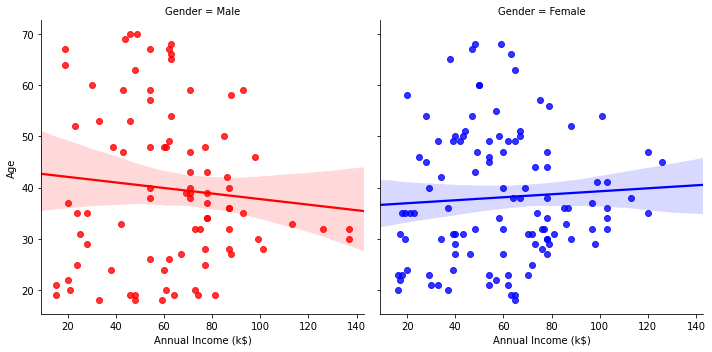

In [10]:
sns.color_palette("Paired", 8)
g = sns.lmplot(x="Annual Income (k$)", y="Age",col="Gender",palette=['r','b'],
               hue="Gender", data=data, truncate=False)

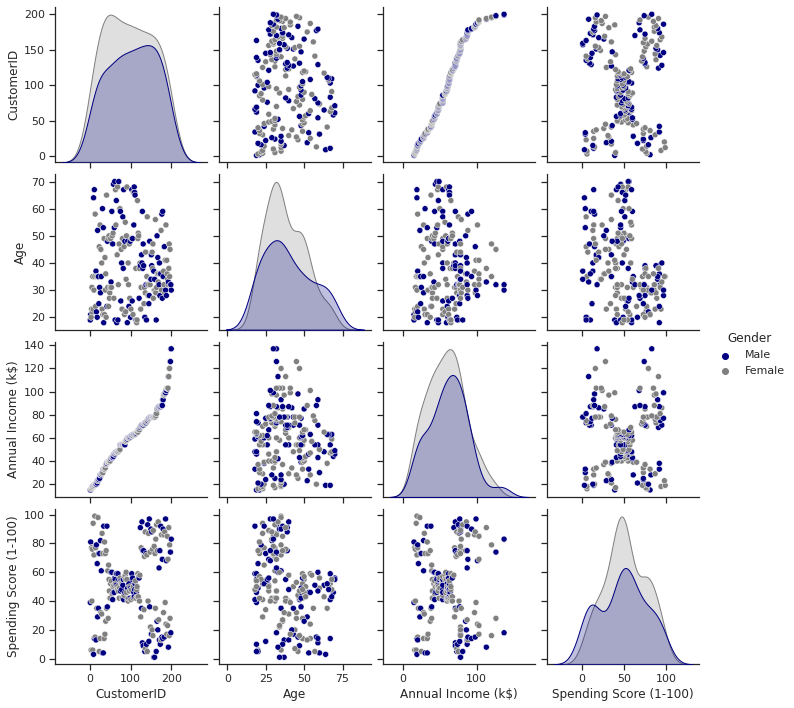

In [11]:
sns.set_theme(style="ticks", palette=['navy', 'grey'])
sns.pairplot(data, hue="Gender")

### Clusters creation 

Specifying the thr optimal numbeer of clusters

In [12]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[269981.2800000001, 181363.59595959593, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21850.165282585633, 19672.07284901432]


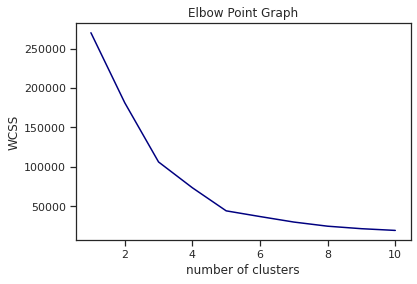

In [13]:
plt.plot(range(1,11), WCSS)
plt.title('Elbow Point Graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

* Two elbow pionts 3 and 5
* 5 will be taken as the optimal number of clusters

In [14]:
#training k-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y= kmeans.fit_predict(X)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


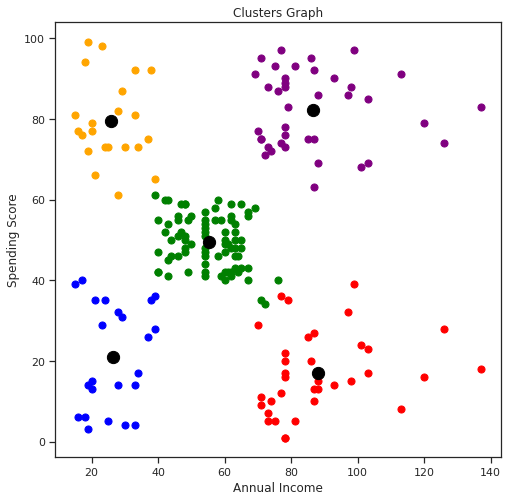

In [15]:
#visualizing clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0],X[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0],X[y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[y==3,0],X[y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(X[y==4,0],X[y==4,1], s=50, c='purple', label='Cluster 5')
#centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
           ,s=150, c='black', label='Centroids')
#labels
plt.title('Clusters Graph')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()